In [1]:
import pandas as pd

In [2]:
import datetime

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('./train.csv', index_col=0)

In [5]:
#dt = pd.read_csv('./test.csv', index_col=0)

In [6]:
df.dtypes

date                    object
product_id               int64
cat_id                   int64
live_rate              float64
score_mean             float64
score_count            float64
price_group            float64
discount_percentage    float64
sold_count             float64
dtype: object

In [7]:
df.fillna({'score_mean':-1}, inplace=True)

In [8]:
df.score_mean.isna().sum()

0

In [9]:
df.date = pd.to_datetime(df.date, format='%Y/%m/%d')
df['day_of_week'] = df.date.dt.day_of_week  # .astype('category')
df['day_of_month'] = df.date.dt.day
df['day_of_year'] = df.date.dt.day_of_year
#df = df.astype({'product_id':'category', 'cat_id':'category', 'price_group':'category'})
df.dtypes

date                   datetime64[ns]
product_id                      int64
cat_id                          int64
live_rate                     float64
score_mean                    float64
score_count                   float64
price_group                   float64
discount_percentage           float64
sold_count                    float64
day_of_week                     int64
day_of_month                    int64
day_of_year                     int64
dtype: object

In [10]:
df.date.nunique()

70

In [11]:
df.date.min()

Timestamp('2018-06-30 00:00:00')

In [31]:
df.date.max() - df.date.min()

Timedelta('69 days 00:00:00')

In [22]:
df.cat_id.nunique()

184

In [32]:
df.product_id.nunique()

7650

In [39]:
dp = df[df.product_id.isin(df.product_id.iloc[-10:])].sort_values('date')

In [40]:
dp.shape

(592, 12)

In [41]:
sample_mat_x = dp.drop('sold_count', axis=1)
sample_vec_y = dp['sold_count']

<AxesSubplot:xlabel='date', ylabel='sold_count'>

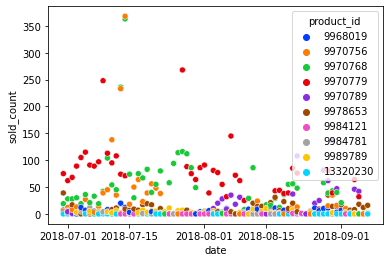

In [42]:
sns.scatterplot(data=sample_mat_x, x='date', y=sample_vec_y, hue='product_id', palette='bright')

In [19]:
dp.date.max() - dp.date.min()

Timedelta('69 days 00:00:00')

In [49]:
bound = df.date.min() + pd.Timedelta("40 days")
dp_train = dp[dp.date < bound]
dp_test = dp[dp.date >= bound]

In [50]:
dp_train.date.max() - dp_train.date.min()

Timedelta('39 days 00:00:00')

In [51]:
dp_test.date.max() - dp_test.date.min()

Timedelta('29 days 00:00:00')

In [15]:
bound = df.date.min() + pd.Timedelta("31 days")
dp_train = df[df.date < bound]
dp_test = df[df.date >= bound]
x_train = dp_train.drop(['sold_count', 'date'], axis=1)
x_test = dp_test.drop(['sold_count', 'date'], axis=1)
y_train = dp_train['sold_count']
y_test = dp_test['sold_count']

In [16]:
df.day_of_month.nunique()

31

In [17]:
y_train = dp_train['sold_count']
y_test = dp_test['sold_count']

In [18]:
for this in [x_train, y_train, x_test, y_test]:
    print(this.shape)

(181810, 10)
(181810,)
(205215, 10)
(205215,)
